In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
data = '/content/drive/MyDrive/Bank_churn.csv'

In [3]:
import pandas as pd
df = pd.read_csv(data)

**EDA**

In [4]:
df.head()

rownumber  customerid   surname  creditscore geography  gender  age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   tenure    balance  numofproducts  hascrcard  isactivemember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   estimatedsalary  churn  
0        101348.88      1  
1        112542.58      0  
2        113931.57      1  
3         93826.63      0  
4         79084.10      0

In [5]:
df.describe()

rownumber    customerid   creditscore           age        tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             balance  numofproducts    hascrcard  isactivemember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       estimatedsalary         churn  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

In [6]:
df.shape

(10000, 14)

In [7]:
df.duplicated().sum()

0

In [8]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for column in ['geography', 'gender']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rownumber        10000 non-null  int64  
 1   customerid       10000 non-null  int64  
 2   surname          10000 non-null  object 
 3   creditscore      10000 non-null  int64  
 4   geography        10000 non-null  int64  
 5   gender           10000 non-null  int64  
 6   age              10000 non-null  int64  
 7   tenure           10000 non-null  int64  
 8   balance          10000 non-null  float64
 9   numofproducts    10000 non-null  int64  
 10  hascrcard        10000 non-null  int64  
 11  isactivemember   10000 non-null  int64  
 12  estimatedsalary  10000 non-null  float64
 13  churn            10000 non-null  int64  
dtypes: float64(2), int64(11), object(1)
memory usage: 1.1+ MB


In [10]:
df = df.drop(columns=['surname'])

In [11]:
df = df.drop(columns=['customerid'])

In [12]:
df = df.drop(columns=['rownumber'])

<Axes: >

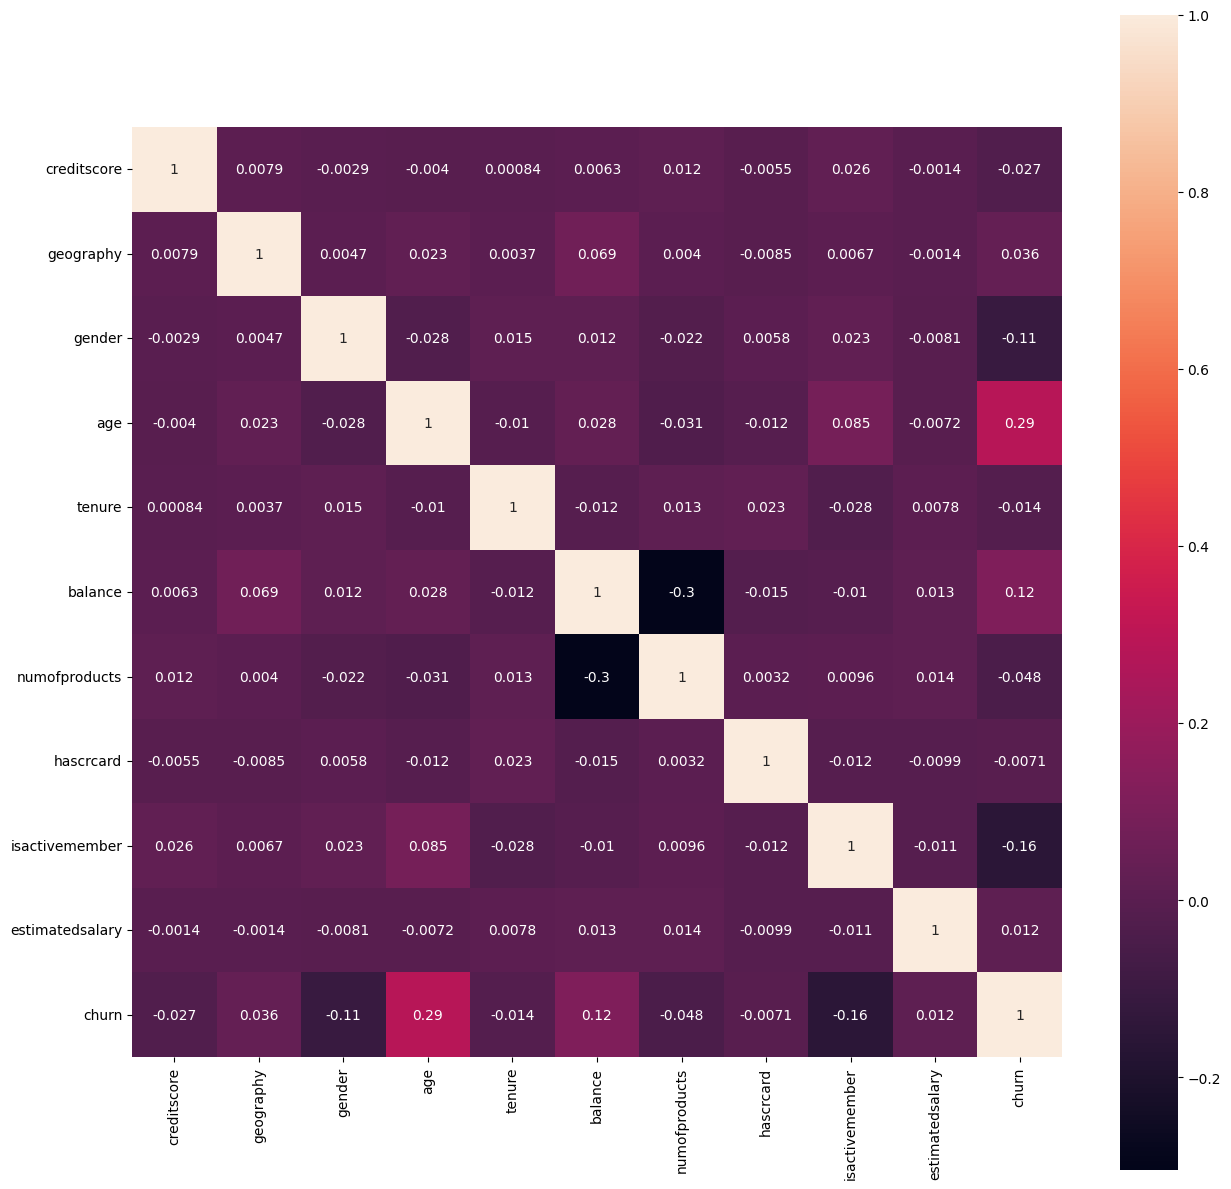

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

datacorr = df.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(datacorr, annot = True, square = True)

**Feature Engineering**

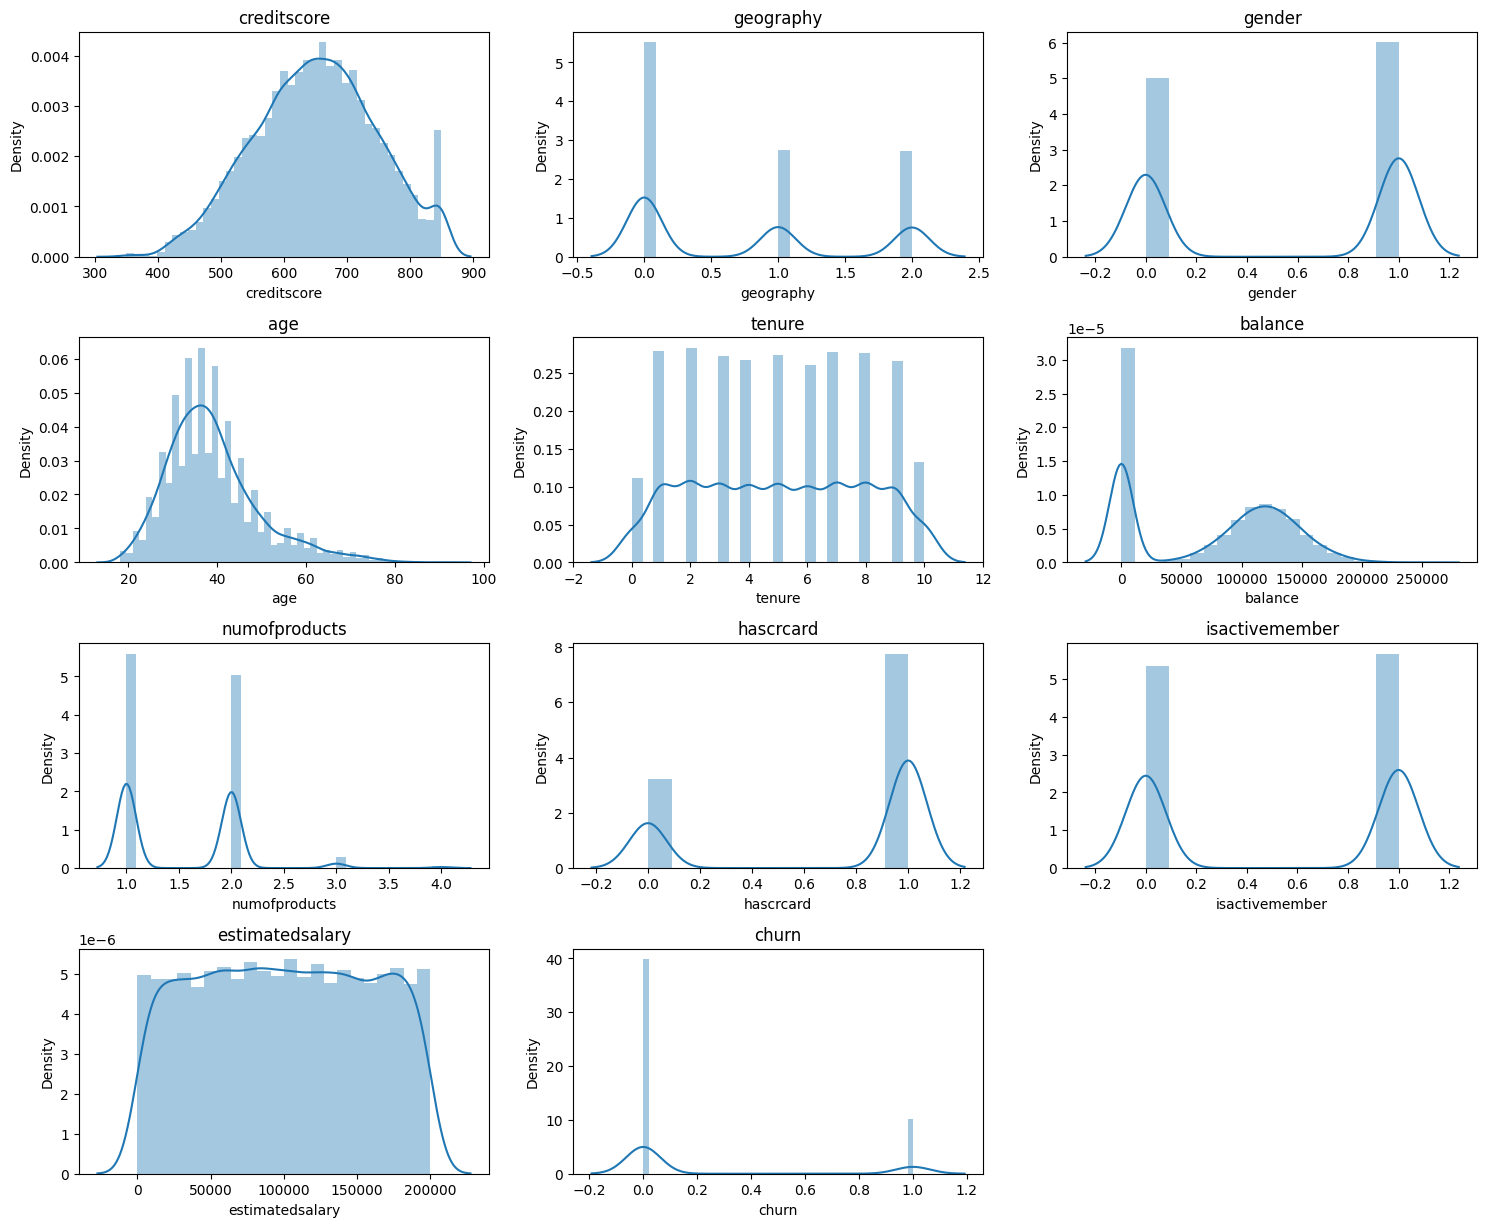

In [14]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(15, 15))

for i, column in enumerate(df.columns):
    plt.subplot(5, 3, i+1)
    sns.distplot(df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['creditscore', 'age', 'balance']])

In [16]:
churn_counts = df['churn'].value_counts()
print(churn_counts)

churn
0    7963
1    2037
Name: count, dtype: int64


In [17]:
import pandas as pd
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='minority', random_state=42)
oversampled_X, oversampled_Y = sm.fit_resample(df.drop('churn', axis=1), df['churn'])
oversampled = pd.concat([pd.DataFrame(oversampled_X), pd.DataFrame(oversampled_Y)], axis=1)

In [18]:
oversampled

creditscore  geography  gender  age  tenure        balance  \
0              619          0       0   42       2       0.000000   
1              608          2       0   41       1   83807.860000   
2              502          0       0   42       8  159660.800000   
3              699          0       0   39       1       0.000000   
4              850          2       0   43       2  125510.820000   
...            ...        ...     ...  ...     ...            ...   
15921          773          1       0   47       5  108732.431561   
15922          465          1       0   56       7  127070.846317   
15923          603          1       0   32       3  102755.340078   
15924          732          0       0   47       5       0.000000   
15925          706          0       0   31       7       0.000000   

       numofproducts  hascrcard  isactivemember  estimatedsalary  churn  
0                  1          1               1    101348.880000      1  
1                  1          0               1    112542.580000      0  
2                  3          1               0    113931.570000      1  
3                  2          0               0     93826.630000      0  
4                  1          1               1     79084.100000      0  
...              ...        ...             ...              ...    ...  
15921              1          1               0    184555.335538      1  
15922              1          1               0     51834.800300      1  
15923              2          0               0    189755.014496      1  
15924              3          1               0     89933.242727      1  
15925              1          1               0     28675.783564      1  

[15926 rows x 11 columns]

In [19]:
churn_counts = oversampled['churn'].value_counts()
print(churn_counts)

churn
1    7963
0    7963
Name: count, dtype: int64


In [20]:
x = oversampled.iloc[:,:-1]
y = oversampled.iloc[:,-1]

In [21]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, random_state = 42, test_size = 0.2)

Logistic Regression


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score,accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, f1_score
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)

lr_y_pred = lr_model.predict(x_test)

lr_accuracy = accuracy_score(y_test, lr_y_pred)
lr_precision = precision_score(y_test, lr_y_pred)
lr_recall = recall_score(y_test, lr_y_pred)
lr_f1 = f1_score(y_test, lr_y_pred)

print("Accuracy:", lr_accuracy)
print("Precision:", lr_precision)
print("Recall:", lr_recall)
print("F1 Score:", lr_f1)

Accuracy: 0.763653483992467
Precision: 0.7525252525252525
Recall: 0.7675466838377334
F1 Score: 0.759961746891935


In [24]:
pip install lime

LIME - Local explanation of how does the LR model classifies the first test data


In [25]:
import lime
import lime.lime_tabular
explainer = lime.lime_tabular.LimeTabularExplainer(x_train, mode='classification', feature_names=x.columns)

instance = x_test[0]
exp = explainer.explain_instance(instance, lr_model.predict_proba)

exp.show_in_notebook(show_table=True)

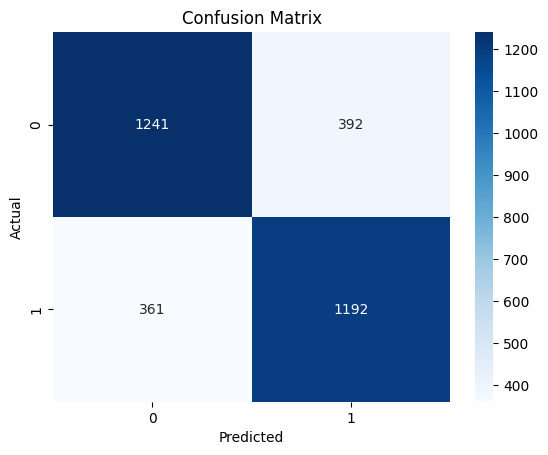

In [26]:
cm = confusion_matrix(y_test, lr_y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Random Forest Classifier

In [27]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)

rf_y_pred = rf_model.predict(x_test)

rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_precision = precision_score(y_test, rf_y_pred)
rf_recall = recall_score(y_test, rf_y_pred)
rf_f1 = f1_score(y_test, rf_y_pred)

print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1)

Accuracy: 0.8634651600753296
Precision: 0.8472049689440994
Recall: 0.8783000643915003
F1 Score: 0.8624723363895036


In [28]:
explainer = lime.lime_tabular.LimeTabularExplainer(x_train, mode='classification', feature_names=x.columns)

instance = x_test[0]
exp = explainer.explain_instance(instance, rf_model.predict_proba)

exp.show_in_notebook(show_table=True)

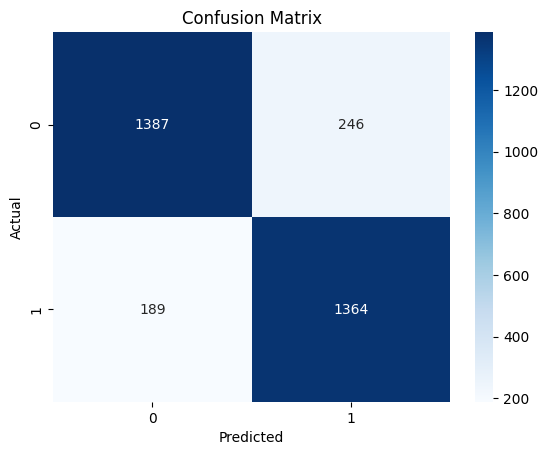

In [29]:
cm = confusion_matrix(y_test, rf_y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

XGBOOST classfier


In [30]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

xgb_model = XGBClassifier()

xgb_model.fit(x_train, y_train)
xgb_y_pred = xgb_model.predict(x_test)

xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
xgb_precision = precision_score(y_test, xgb_y_pred)
xgb_recall = recall_score(y_test, xgb_y_pred)
xgb_f1 = f1_score(y_test, xgb_y_pred)

print("Accuracy:", xgb_accuracy)
print("Precision:", xgb_precision)
print("Recall:", xgb_recall)
print("F1 Score:", xgb_f1)

Accuracy: 0.8618957940991839
Precision: 0.8462974486621033
Recall: 0.875724404378622
F1 Score: 0.860759493670886


In [31]:
explainer = lime.lime_tabular.LimeTabularExplainer(x_train, mode='classification', feature_names=x.columns)

instance = x_test[0]
exp = explainer.explain_instance(instance, xgb_model.predict_proba)

exp.show_in_notebook(show_table=True)

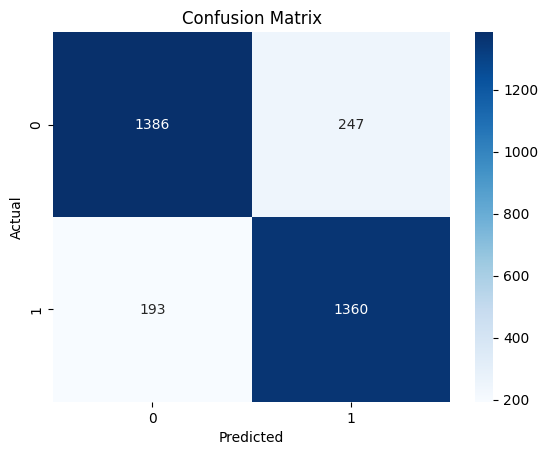

In [32]:
cm = confusion_matrix(y_test, xgb_y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

SVM model

In [33]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear')

svm_model.fit(x_train, y_train)
svm_y_pred = svm_model.predict(x_test)

svm_accuracy = accuracy_score(y_test, svm_y_pred)
svm_precision = precision_score(y_test, svm_y_pred)
svm_recall = recall_score(y_test, svm_y_pred)
svm_f1 = f1_score(y_test, svm_y_pred)

print("Accuracy:", svm_accuracy)
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("F1 Score:", svm_f1)

Accuracy: 0.761142498430634
Precision: 0.7519083969465649
Recall: 0.7611075338055376
F1 Score: 0.75648


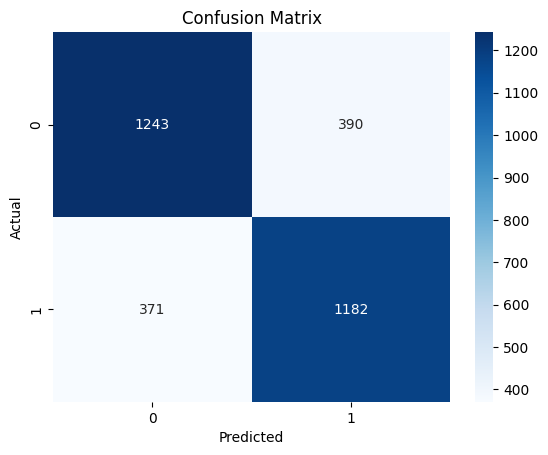

In [36]:
cm = confusion_matrix(y_test, svm_y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Stacking Classifier

In [37]:
from sklearn.ensemble import StackingClassifier
estimators = [('lr', lr_model), ('rf', rf_model), ('svm', svm_model)]
stack = StackingClassifier(estimators=estimators)
stack.fit(x_train, y_train)
stack_y_pred_bal = stack.predict(x_test)

bal_stack_accuracy = accuracy_score(y_test, stack_y_pred_bal)
bal_stack_precision = precision_score(y_test, stack_y_pred_bal)
bal_stack_recall = recall_score(y_test, stack_y_pred_bal)
bal_stack_f1 = f1_score(y_test, stack_y_pred_bal)

print("Accuracy:", bal_stack_accuracy)
print("Precision:", bal_stack_precision)
print("Recall:", bal_stack_recall)
print("F1 Score:", bal_stack_f1)

Accuracy: 0.8590709353421218
Precision: 0.8476070528967254
Recall: 0.866709594333548
F1 Score: 0.857051894301178


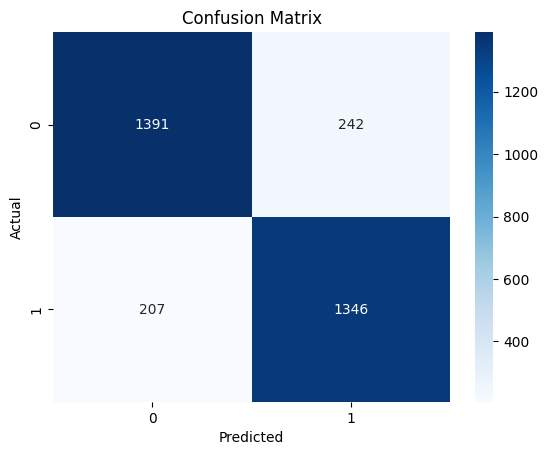

In [38]:
cm = confusion_matrix(y_test, stack_y_pred_bal)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

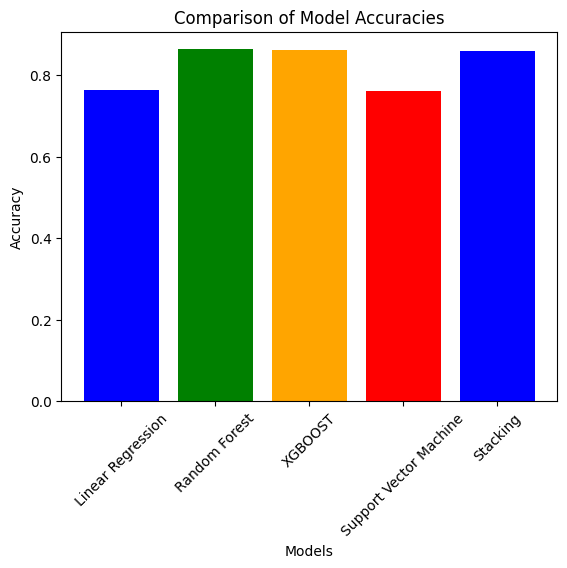

In [41]:
import matplotlib.pyplot as plt

models = ['Linear Regression', 'Random Forest', 'XGBOOST', 'Support Vector Machine', 'Stacking']

accuracy_scores = [lr_accuracy, rf_accuracy, xgb_accuracy, svm_accuracy, bal_stack_accuracy]

plt.bar(models, accuracy_scores, color=['blue', 'green', 'orange', 'red'])

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.xticks(rotation=45)
plt.show()

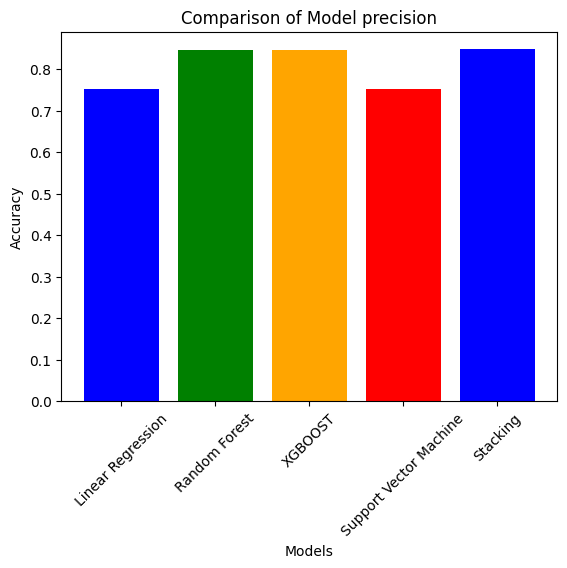

In [44]:
import matplotlib.pyplot as plt

models = ['Linear Regression', 'Random Forest', 'XGBOOST', 'Support Vector Machine', 'Stacking']

accuracy_scores = [lr_precision, rf_precision, xgb_precision, svm_precision, bal_stack_precision]

plt.bar(models, accuracy_scores, color=['blue', 'green', 'orange', 'red'])

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model precision')
plt.xticks(rotation=45)
plt.show()

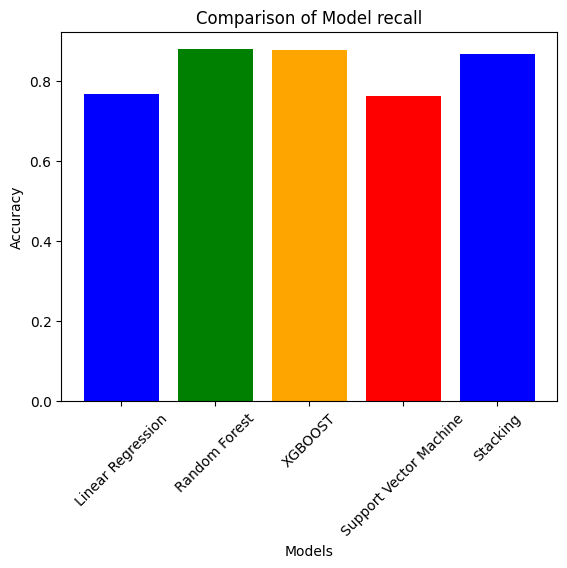

In [45]:
import matplotlib.pyplot as plt

models = ['Linear Regression', 'Random Forest', 'XGBOOST','Support Vector Machine', 'Stacking']

accuracy_scores = [lr_recall, rf_recall,xgb_recall, svm_recall, bal_stack_recall]

plt.bar(models, accuracy_scores, color=['blue', 'green', 'orange', 'red'])

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model recall')
plt.xticks(rotation=45)
plt.show()

In [46]:

import pickle
filename = '/content/drive/MyDrive/stacking_model.pkl'
pickle.dump(stack, open(filename, 'wb'))